In [1]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime
from dateutil import parser
from sklearn import preprocessing
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv("/Users/smph/Desktop/dataScience/project/daily_electricity_usage.csv", parse_dates=["date"],index_col=1)
#dataset = pd.read_csv("/Users/smph/Desktop/dataScience/project/daily_electricity_usage.csv")
#dataset['date'] = pd.to_datetime(dataset['date'])

In [3]:
dataset.head(5)

,Meter ID,total daily KW
date,,
2009-07-14,1000,11.203
2009-07-15,1000,8.403
2009-07-16,1000,7.225
2009-07-17,1000,11.338
2009-07-18,1000,11.306


In [13]:
#getting the range
rng = pd.date_range('2009-07-14',periods=536,freq='D')

In [5]:
#making new dataFrame for new storage
new_data = pd.DataFrame({'date':rng}).set_index('date')

In [6]:
#splitting the data and grouping by customers
for i in range(1000,7445):
    x=dataset[dataset['Meter ID']==i][['total daily KW']]
    new_data=pd.merge(new_data,x, how = "outer", left_index=True, right_index=True)


In [9]:
#changing column names
for i in range(0,6445):
    new_data.columns.values[i]="ID"+str(1000+i)

In [11]:
#getting samples
new_data.head(5)

,ID1000,ID1001,ID1002,ID1003,ID1004,ID1005,ID1006,ID1007,ID1008,ID1009,...,ID7435,ID7436,ID7437,ID7438,ID7439,ID7440,ID7441,ID7442,ID7443,ID7444
date,,,,,,,,,,,,,,,,,,,,,
2009-07-14,11.203,6.744,6.355,24.183,50.057,17.765,12.056,30.399,27.217,51.865,...,15.643,36.500,15.346,0.732,138.130,41.813,14.491,36.813,5.112,52.940
2009-07-15,8.403,6.949,8.972,26.659,48.813,19.801,17.169,23.976,31.996,42.740,...,14.667,29.443,26.156,0.685,115.893,31.572,12.597,40.492,18.233,35.582
2009-07-16,7.225,7.255,8.794,32.017,32.555,15.216,16.260,34.534,24.363,56.390,...,18.037,28.786,23.945,0.707,127.698,32.618,15.816,41.487,6.925,29.307
2009-07-17,11.338,7.190,8.306,33.032,46.727,23.418,14.813,19.251,23.122,43.604,...,11.512,31.394,23.118,0.655,142.211,36.614,13.162,43.986,5.370,40.986
2009-07-18,11.306,6.805,10.119,31.238,35.215,29.392,12.325,21.392,25.721,41.581,...,30.767,22.112,15.582,0.682,4.641,27.982,13.301,41.018,6.751,40.270


In [12]:
#getting information about the data
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 536 entries, 2009-07-14 to 2010-12-31
Columns: 6445 entries, ID1000 to ID7444
dtypes: float64(6445)
memory usage: 26.4 MB


In [15]:
#filling missing values with its mean
new_data = new_data.fillna(new_data.mean())

In [45]:
new_data.index[0:-1]

TypeError: 'numpy.ndarray' object is not callable

In [48]:
#making new column for the day of the week
new_data['day'] = new_data.index.weekday


In [66]:
#getting the customer IDs and save it in a variable
cols=new_data.columns[0:-1]

In [77]:
#making new Dataframe df
df = pd.DataFrame({'Meter ID':range(1000,7445,1),'total KW':np.sum(new_data[cols]).values})

In [78]:
#getting the daily average consumption per customer
df['daily_avg_consumption']=new_data[cols].mean().values

In [79]:
#getting the percentage of consumption on weekdays and storing it in df dataframe
df['%_weekday_consumption']=new_data[(new_data['day']!=5)&(new_data['day']!=6)][cols].sum().values/df['total KW']*100

In [80]:
#getting an overview of the df dataframe
df.head(10)

,Meter ID,total KW,daily_avg_consumption,%_weekday_consumption
0,1000,5515.675000,10.290438,70.009926
1,1001,5090.375000,9.496968,72.241122
2,1002,5352.830000,9.986623,75.364938
3,1003,16305.581000,30.420860,71.173342
4,1004,25326.442000,47.250825,69.775273
5,1005,16062.905000,29.968106,69.828565
6,1006,11518.920000,21.490522,71.692034
7,1007,18745.140277,34.972277,68.333211
8,1008,18843.172172,35.155172,70.076041
9,1009,21498.187000,40.108558,70.189496


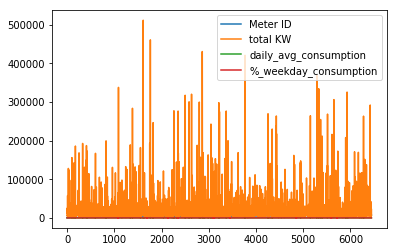

In [81]:
df.plot()